In [27]:
!pip install yfinance
!pip install numpy

import math
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize as sco

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [68]:
assets = ['AAPL','TSLA','NVDA','GOOGL','AMZN','INTC','XOM']

period = '2y'

Adjclose = yf.download(assets,period = period)['Adj Close']

[*********************100%***********************]  7 of 7 completed


In [65]:
returns=Adjclose.pct_change()

VRtable = pd.DataFrame(index=assets)
VRtable['Variance']=(Adjclose.pct_change()*100).var()
VRtable['Mean']=returns.mean()

VRtable

,Variance,Mean
AAPL,3.527415,0.000512
TSLA,15.405173,-0.000467
NVDA,13.543212,0.001489
GOOGL,4.793521,-0.000036
AMZN,7.249969,-0.000090
INTC,5.642198,-0.000154
XOM,3.792020,0.001369


In [67]:
returns.corr()

,AAPL,AMZN,GOOGL,INTC,NVDA,TSLA,XOM
AAPL,1.000000,0.618737,0.703029,0.564147,0.661545,0.578799,0.230003
AMZN,0.618737,1.000000,0.686723,0.467404,0.599930,0.495105,0.150008
GOOGL,0.703029,0.686723,1.000000,0.524232,0.639484,0.464458,0.137875
INTC,0.564147,0.467404,0.524232,1.000000,0.526342,0.386929,0.205281
NVDA,0.661545,0.599930,0.639484,0.526342,1.000000,0.572954,0.126140
TSLA,0.578799,0.495105,0.464458,0.386929,0.572954,1.000000,0.095758
XOM,0.230003,0.150008,0.137875,0.205281,0.126140,0.095758,1.000000


In [31]:
def port_ret(weights):
    return np.sum(returns.mean() * weights) * 252

def port_vol(weights):
    return np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))

In [79]:
portfolio = len(assets)
prets = []
pvols = []
pwt = []

for p in range (25000):    
    weights = np.random.random(portfolio)                   
    weights /= np.sum(weights) 
    pwt.append(weights)

    prets.append(port_ret(weights)) 
    pvols.append(port_vol(weights))
prets = np.array(prets)
pvols = np.array(pvols)
weights

array([0.14832153, 0.0705666 , 0.15334178, 0.21053907, 0.13604991,
       0.20245538, 0.07872572])

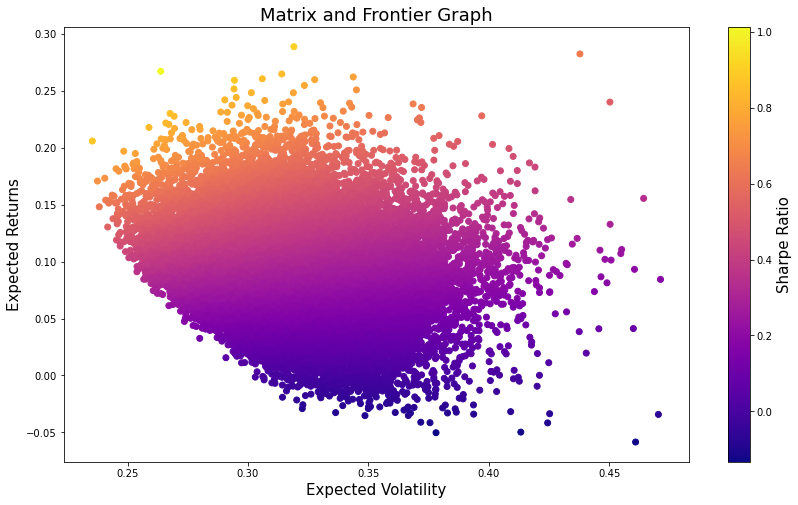

In [77]:
from pylab import mpl, plt

sharpe = prets/pvols

plt.figure(figsize=(14, 8))
scatter = plt.scatter(pvols, prets, c=prets / pvols,marker='o', cmap='plasma')
plt.xlabel('Expected Volatility', fontsize = 15)
plt.ylabel('Expected Returns', fontsize = 15)
colorbar = plt.colorbar(scatter, label='Sharpe Ratio')
colorbar.ax.yaxis.label.set_size(15)
plt.title('Matrix and Frontier Graph', fontsize = 18)

plt.show()

In [85]:
sharperatio = np.array(sharpe).argmax()
optw = np.array(pwt)[sharperatio]
max_ret = prets[high_SR]
max_vol = pvols[high_SR]
optwt = pd.DataFrame({'Optimal Weight' : optw}, index = assets)
optwt

,Optimal Weight
AAPL,0.055475
TSLA,0.041574
NVDA,0.158332
GOOGL,0.172234
AMZN,0.256052
INTC,0.248425
XOM,0.067909
